<a href="https://colab.research.google.com/github/JamesBarciz/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/James_Barciz_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
list = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [0]:
#mean = sum(list)//len(list)
#mean

In [0]:
#std_list = []
#for x in list:
#  std_list.append((mean-x)**2)
#print(std_list)

In [0]:
#std = (sum(std_list)//len(std_list))**0.5 # Square Root w/o math library
#print(round(std, 0))

In [0]:
def MeanVarStd(list):
  mean = sum(list)//len(list)
  std_list = []
  for x in list:
    std_list.append((mean-x)**2)
  var = sum(std_list)//len(std_list)
  std = round(var**0.5, 0)
  return mean, var, std

In [6]:
MeanVarStd(list)

(3052, 183761, 429.0)

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
list2 = [127, 80, 105, 92, 120, 115, 93]

def get_covar(a, b):
  mean1 = sum(a)//len(a)
  mean2 = sum(b)//len(b)
  
  pre_cov1 = []
  pre_cov2 = []
  
  for i in a:
    pre_cov1.append(mean1-i)
  for ii in b:
    pre_cov2.append(mean2-ii)
  
  covariance = (sum(pre_cov1)+sum(pre_cov2))//len(a)-1
  return covariance

In [8]:
get_covar(list, list2)

-3

In [0]:
import pandas as pd
import numpy as np
import math

In [10]:
l1 = np.mean(list)
l2 = np.mean(list2)
print(l1)
print(l2)

3052.714285714286
104.57142857142857


In [11]:
p_cov1 = []
p_cov2 = []

for i in list:
  p_cov1.append(i - l1)
for ii in list2:
  p_cov2.append(ii-l2)
print(p_cov1)
print(p_cov2)

[452.2857142857142, -652.7142857142858, -25.71428571428578, -254.71428571428578, 647.2857142857142, 197.28571428571422, -363.7142857142858]
[22.42857142857143, -24.57142857142857, 0.4285714285714306, -12.57142857142857, 15.42857142857143, 10.42857142857143, -11.57142857142857]


In [12]:
cov = (sum(p_cov1) + sum(p_cov2))//len(list)-1
cov

-2.0

Though I feel that I made a correct function, I am getting 2 different answers for covariance between list and list2

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [13]:
c_list = [1,2,3,4,5,6,7]

print(MeanVarStd(c_list)[1]) # Standard Dev of customers

4


In [0]:
sales = [x + y for x, y in zip(list, list2)]

In [15]:
d = {'Customers': c_list, 'Sales': sales}
df = pd.DataFrame(data=d)
df

,Customers,Sales
0,1,3632
1,2,2480
2,3,3132
3,4,2890
4,5,3820
5,6,3365
6,7,2782


In [16]:
df.std(ddof=0)

Customers      2.000000
Sales        443.899189
dtype: float64

In [17]:
df.cov()

,Customers,Sales
Customers,4.666667,-15.333333
Sales,-15.333333,229887.571429


In [18]:
df.corr()

,Customers,Sales
Customers,1.000000,-0.014804
Sales,-0.014804,1.000000


In [19]:
np.corrcoef(df['Customers'], df['Sales'])

array([[ 1.        , -0.01480388],
       [-0.01480388,  1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [20]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
titanic_num = titanic[['pclass', 'survived', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'boat', 'body', 'has_cabin_number']]

In [22]:
titanic_num.var()

pclass                 0.701969
survived               0.236250
age                  165.850021
sibsp                  1.085052
parch                  0.749195
fare                2678.959738
body                9544.688567
has_cabin_number       0.174613
dtype: float64

In [23]:
titanic_num.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [24]:
titanic_num.corr().as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[ 1.        , -0.31246936, -0.36637036,  0.06083201,  0.0183222 ,
        -0.55862873, -0.03464194, -0.71385746],
       [-0.31246936,  1.        , -0.05019898, -0.02782512,  0.08265957,
         0.24426547,         nan,  0.30225002],
       [-0.36637036, -0.05019898,  1.        , -0.19074716, -0.13087196,
         0.1718924 ,  0.05905885,  0.27188739],
       [ 0.06083201, -0.02782512, -0.19074716,  1.        ,  0.37358719,
         0.16023826, -0.09996053, -0.0090641 ],
       [ 0.0183222 ,  0.08265957, -0.13087196,  0.37358719,  1.        ,
         0.22153866,  0.05109925,  0.03680568],
       [-0.55862873,  0.24426547,  0.1718924 ,  0.16023826,  0.22153866,
         1.        , -0.04311018,  0.5072534 ],
       [-0.03464194,         nan,  0.05905885, -0.09996053,  0.05109925,
        -0.04311018,  1.        ,  0.08379593],
       [-0.71385746,  0.30225002,  0.27188739, -0.0090641 ,  0.03680568,
         0.5072534 ,  0.08379593,  1.        ]])

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
import matplotlib.pyplot as plt

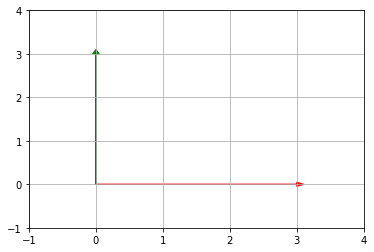

In [26]:
a = [3,0]
b = [0,3]

plt.arrow(0,0, a[0], a[1], head_width=0.1, head_length=0.1, color='r')
plt.arrow(0,0, b[0], b[1], head_width=0.1, head_length=0.1, color='g')
plt.xlim([-1,4])
plt.ylim([-1,4])
plt.grid()
plt.show()

**A synonym for two vectors that are orthogonal is their 'perpendicularity'**

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [27]:
a = [-5,3,7]
b = [6,-8,2]

np.dot(a,b)

-40

**Vectors a and b are not orthogonal in this exercise because their dot product does not equal 0**

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [28]:
c = np.array([2,-15,6,20])

norm_c = np.linalg.norm(c)**2
dot_c = np.dot(c,c)
c_trans_c = np.matmul(c.T,c)

print('Norm^2 C =', norm_c)
print('C dot C =', dot_c)
print('C Transpose * C =', c_trans_c)
print('All of these values are equal to each other')

Norm^2 C = 665.0
C dot C = 665
C Transpose * C = 665
All of these values are equal to each other


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$
\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
= 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} +
8\begin{bmatrix} 0 \\ 1 \end{bmatrix} =
7\hat{i}+12\hat{j}
\begin{align}
$

$
d = \begin{bmatrix} 7\\12 \end{bmatrix} = 7 \begin{bmatrix} 1\\0 \end{bmatrix} + 12 \begin{bmatrix} 0\\1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
$

$
e = \begin{bmatrix} 2\\11\\-8 \end{bmatrix} = 2 \begin{bmatrix} 1\\0\\0 \end{bmatrix} + 11 \begin{bmatrix} 0\\1\\0 \end{bmatrix} - 8 \begin{bmatrix} 0\\0\\1 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [29]:
f = [4,12,11,9,2]

norm = np.linalg.norm(f)
norm

19.131126469708992

$
\begin{align}
\hat{f} = \frac{1}{||f||}f = \frac{1}{19}\begin{bmatrix} 4 \\ 12 \\ 11 \\ 9 \\ 2 \end{bmatrix} = \begin{bmatrix} \frac{4}{19} \\ \frac{12}{19} \\ \frac{11}{19} \\ \frac{9}{19} \\ \frac{2}{19} \end{bmatrix}
\end{align}
$

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

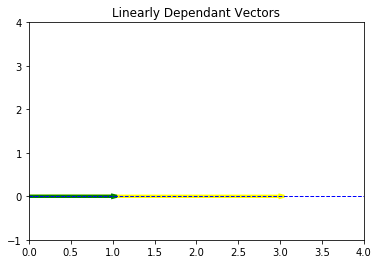

In [30]:
plt.xlim(0,4)
plt.ylim(-1,4)

v = [1,0]
v2 = np.multiply(3,v)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=0.05, head_length=0.05,
          color='yellow')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=0.05, head_length=0.05,
          color='g')

plt.title('Linearly Dependant Vectors')
plt.show()

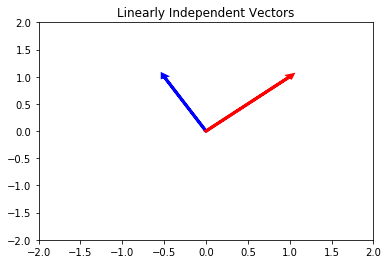

In [33]:
plt.xlim(-2,2)
plt.ylim(-2,2)

a = [-0.5,1]
b = [1,1]

plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=0.05, head_length=0.05, color='b')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=0.05, head_length=0.05, color='r')

plt.title('Linearly Independent Vectors')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

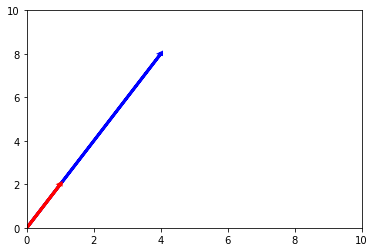

In [38]:
plt.xlim(0,10)
plt.ylim(0,10)

g = [1,2]
h = [4,8]

plt.arrow(0,0, h[0], h[1], linewidth=3, head_width=0.05, head_length=0.05, color='b')
plt.arrow(0,0, g[0], g[1], linewidth=3, head_width=0.05, head_length=0.05, color='r')
plt.show();

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

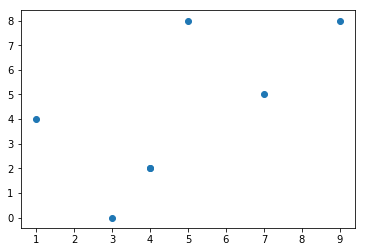

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()